<a href="https://colab.research.google.com/github/EvgenyEsin/Python_libraries_for_DS/blob/main/Python_libraries_for_DS_DZ_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ДЗ к семинару 4
Используя diabetes-dataset, выполните следующие шаги:

1. Предварительная обработка данных:
— Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.
— Разделите датасет на обучающую и тестовую выборки.

2. Построение модели:
— Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.
— Обучите модель на обучающем наборе данных.

3. Оценка модели:
— Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

### Загрузка библиотек

In [56]:
import warnings
warnings.filterwarnings('ignore')
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

###Первичный анализ

In [14]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


 Датасет содержит 2000 записей, 9 столбцов, и все они содержат тип данных `int64`, кроме столбца `BMI` и 'DiabetesPedigreeFunction', которые имеют тип данных `float64`. Пропущенных значений нет.






In [ ]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
df.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,53
Insulin,182
BMI,247
DiabetesPedigreeFunction,505
Age,52
Outcome,2


<Axes: ylabel='Диабет'>

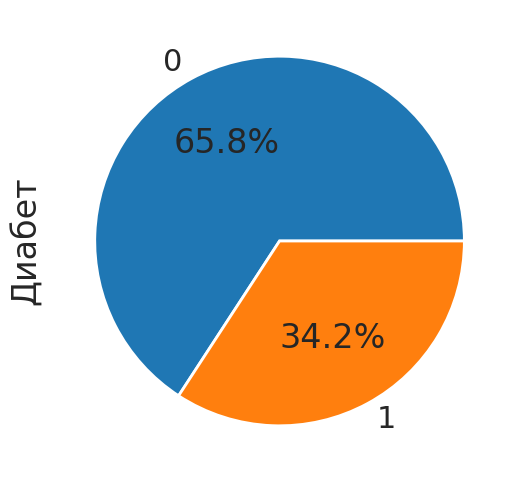

In [ ]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('Outcome').size().plot(kind='pie',
                                       y = "Outcome",
                                       label = "Диабет",
                                       autopct='%1.1f%%')

Наблюдаем ситуацию небольшого дисбаланса целевого признака. С долей 65,8% не страдающих диабетом (класс "0"), и 34.2% страдающих диабетом (класс "1").

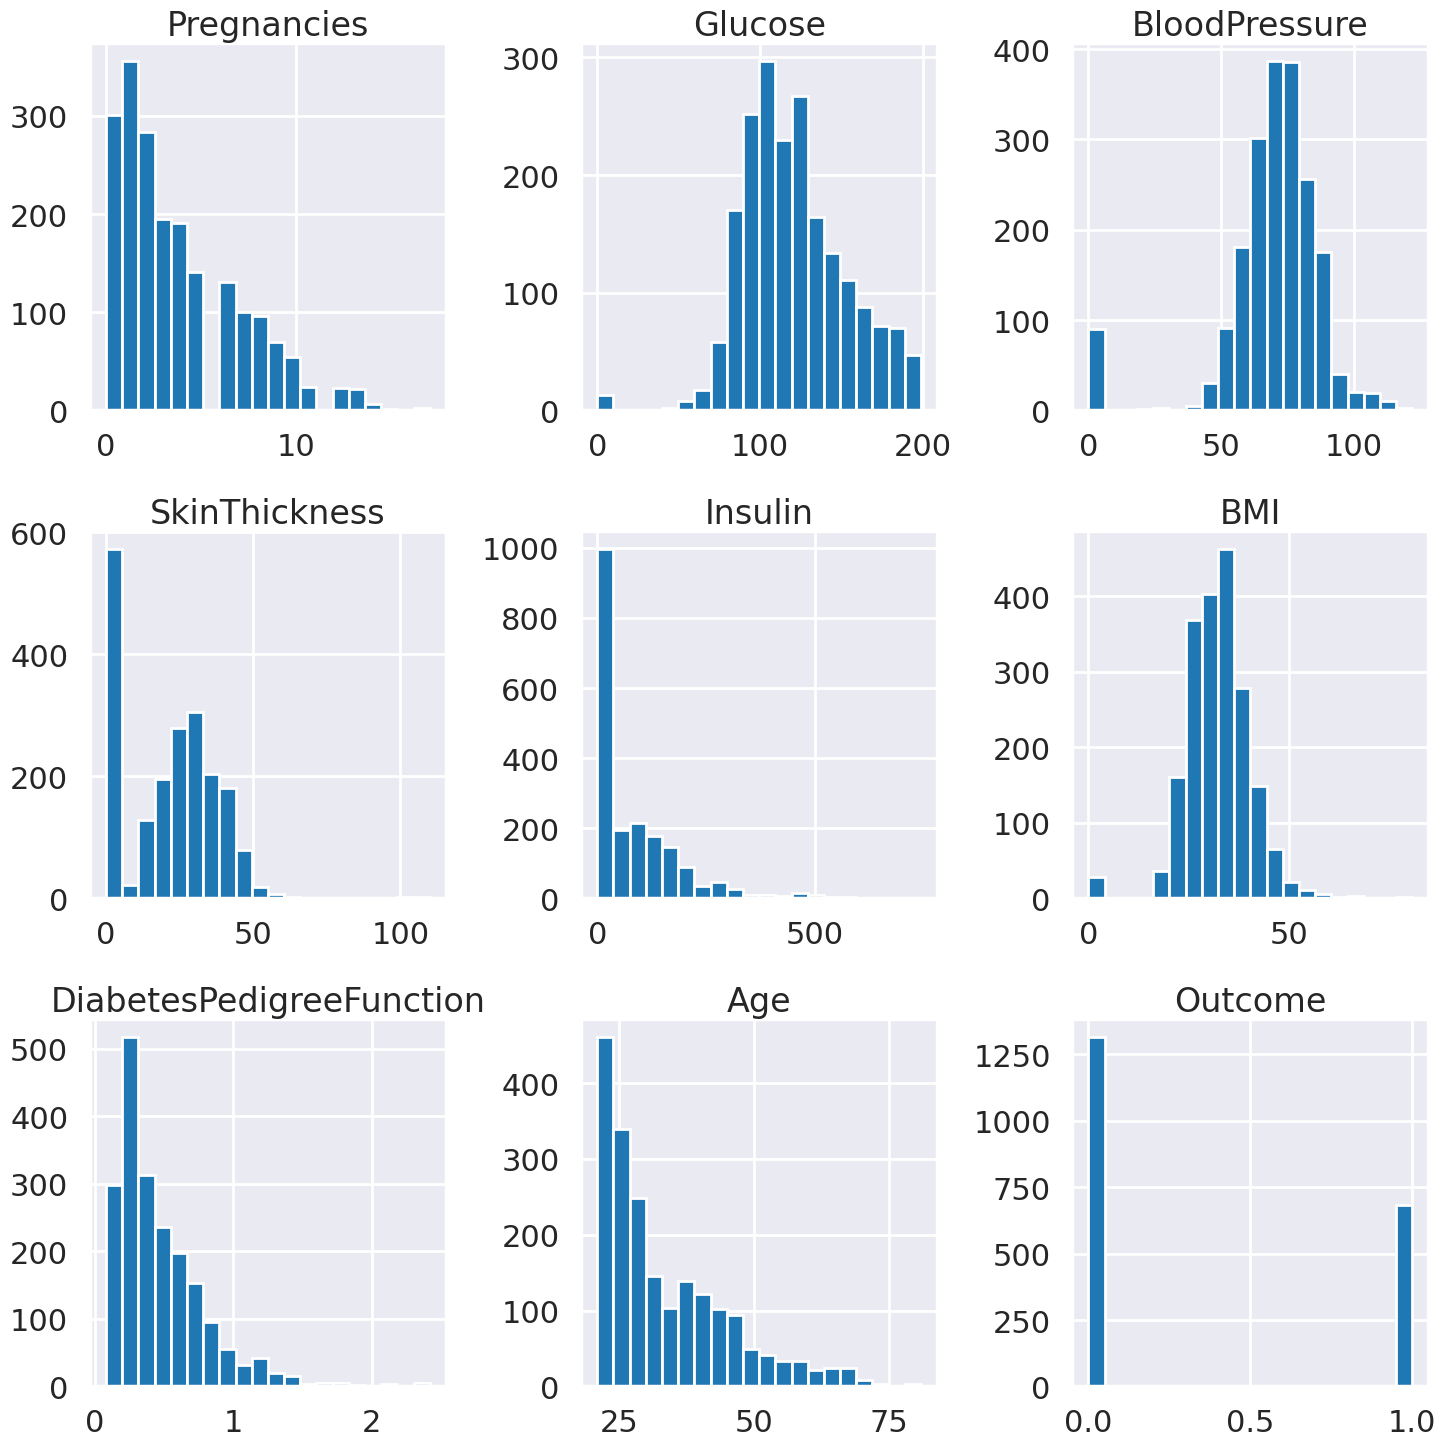

In [26]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df.hist(figsize=(15, 15), bins=20)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.show()

In [28]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Я заметил, что в наборе данных нет пропущенных значений, однако такие функции, как глюкоза, кровяное давление, инсулин, толщина кожи, имеют 0 значений, что невозможно. Мы должны заменить 0 значений либо средними, либо медианными значениями определенного столбца.

In [41]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
# Correcting missing values in blood pressure
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
# Correcting missing values in BMI
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())
# Correct missing values in Insulin and SkinThickness
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

In [42]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.970186,72.257047,27.52450,99.374000,32.645200,0.470930,33.090500,0.342000
std,3.306063,30.533180,11.968614,9.56374,98.438245,7.190254,0.323553,11.786423,0.474498
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.00000,40.000000,27.600000,0.244000,24.000000,0.000000
50%,3.000000,118.000000,72.000000,23.00000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.00000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.00000,744.000000,80.600000,2.420000,81.000000,1.000000


Теперь у меня есть чистый набор данных без пропущенных значений в функциях, и это хорошо.

<Axes: >

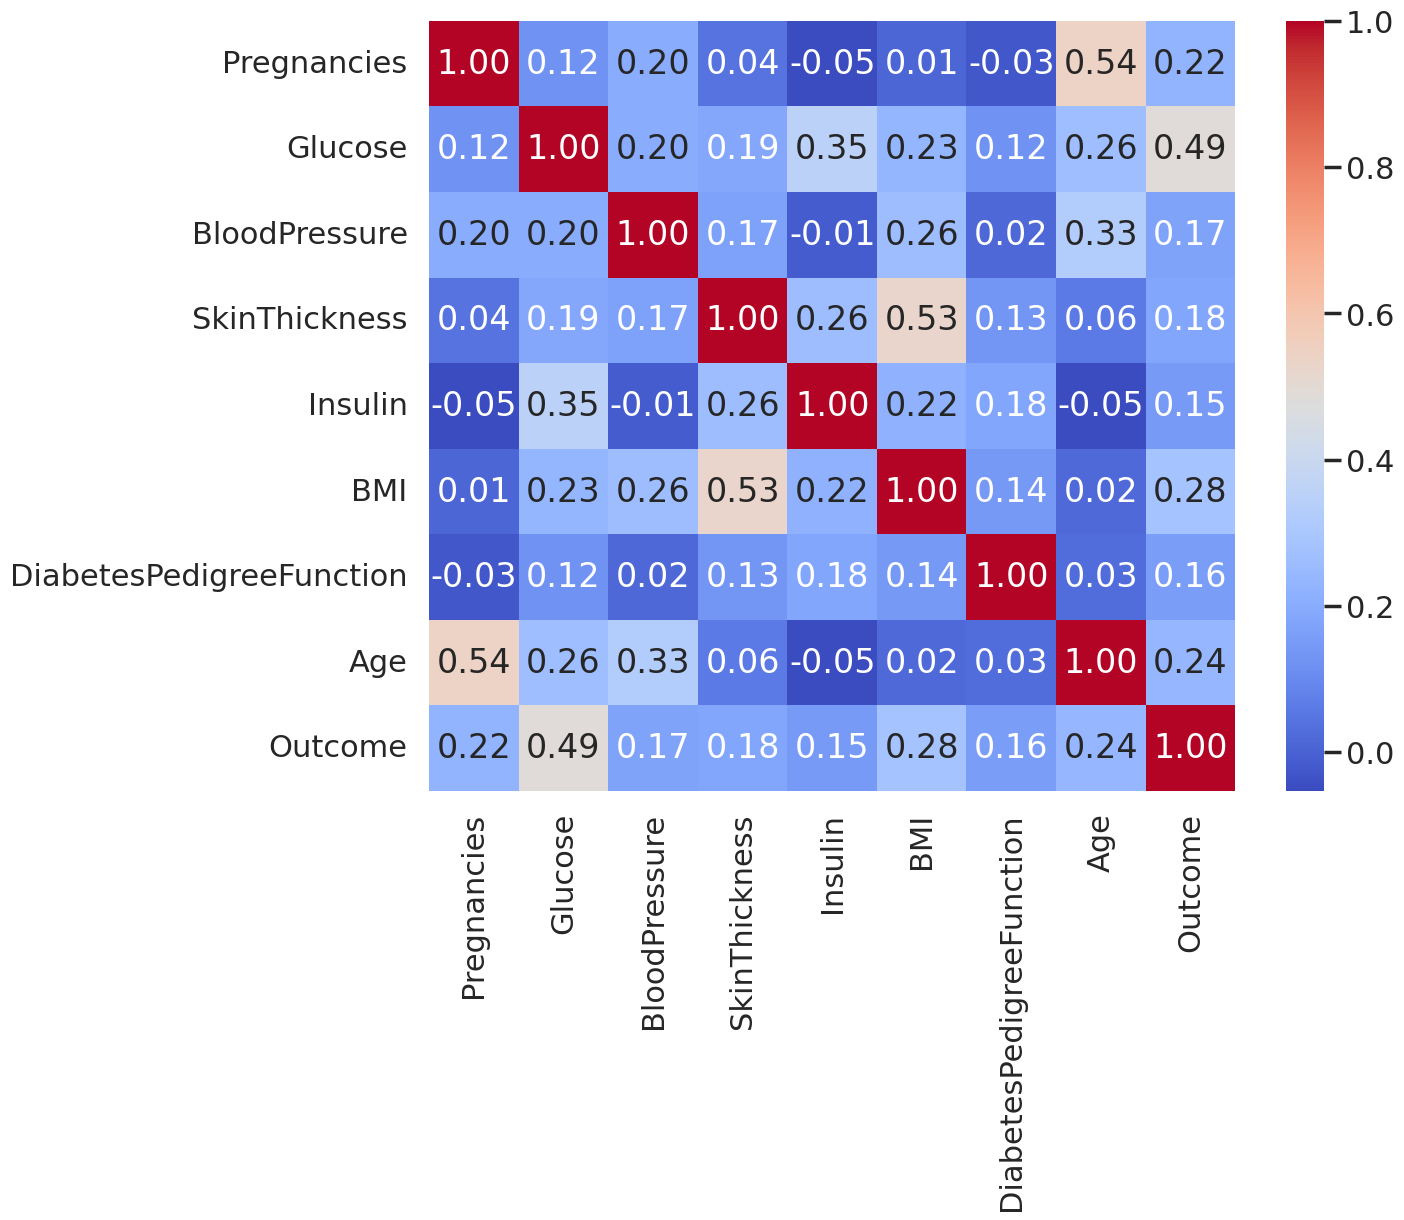

In [43]:
# Корреляция
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Положительная корреляция с переменной "Glucose" (0.49). Логично...
Согласно наблюдениям, такие характеристики, как беременность, уровень глюкозы, ИМТ и возраст, больше коррелируют с исходом. На следующих шагах я продемонстрировал подробное представление этих функций.


Беременность

Женщины с диабетом могут иметь и имеют здоровую беременность и здоровых детей. Лечение диабета может помочь снизить риск осложнений. Невылеченный диабет увеличивает риск осложнений беременности, таких как высокое кровяное давление, депрессия, преждевременные роды, врожденные дефекты и невынашивание беременности.

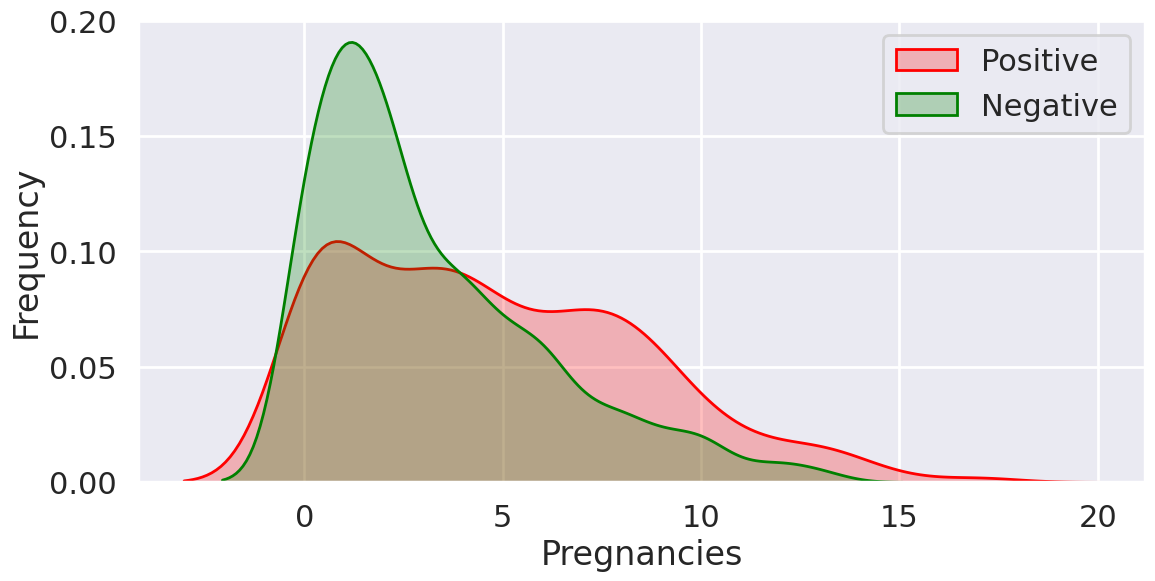

In [44]:
# Explore Pregnancies vs Outcome
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1],
     color="Red", shade = True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0],
     ax =g, color="Green", shade= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

Результат имеет значения 1 и 0, где 1 означает, что у человека диабет, а 0 означает, что у человека нет диабета. Это мой столбец меток в наборе данных.

<Axes: xlabel='Outcome', ylabel='Glucose'>

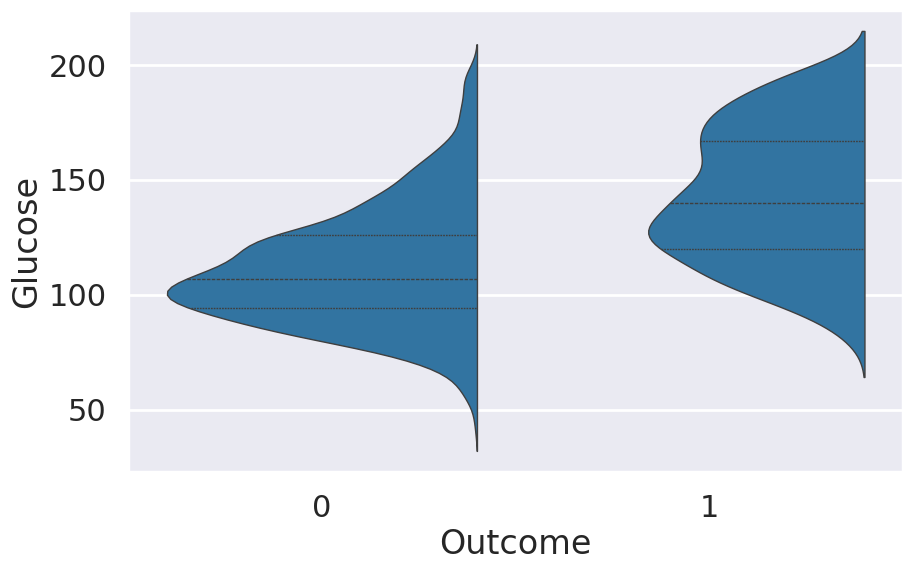

In [45]:
# Глюкоза

# Explore Gluecose vs Outcome
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

Вероятность диабета постепенно увеличивается с уровнем глюкозы.

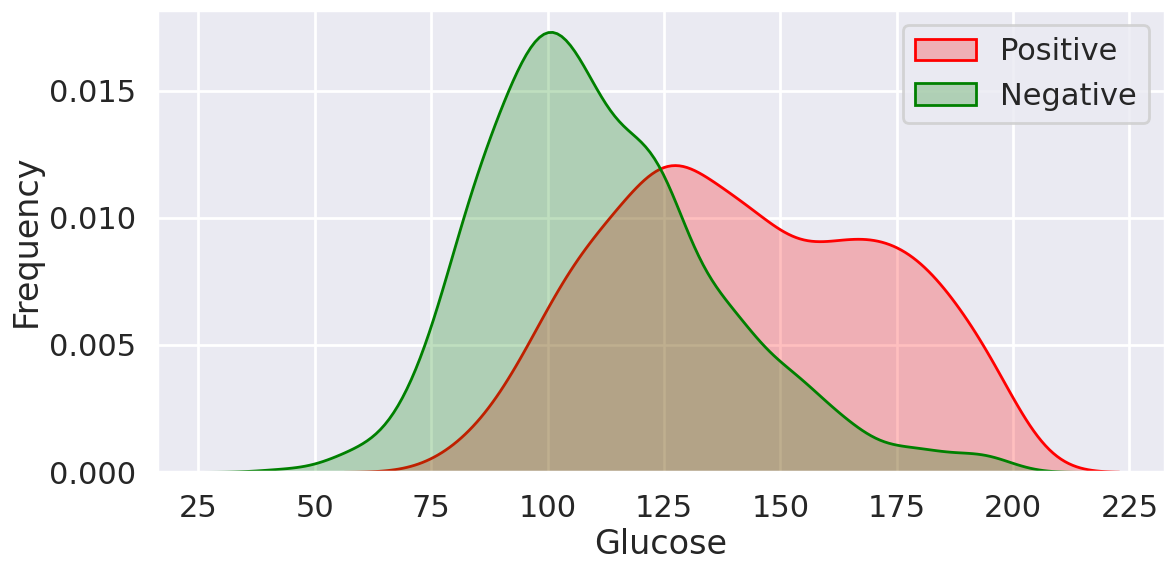

In [46]:
# Explore Glucose vs Outcome

plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 1], color="Red", shade = True)
g = sns.kdeplot(df["Glucose"][df["Outcome"] == 0], ax =g, color="Green", shade= True)
g.set_xlabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

<Axes: xlabel='Glucose', ylabel='BMI'>

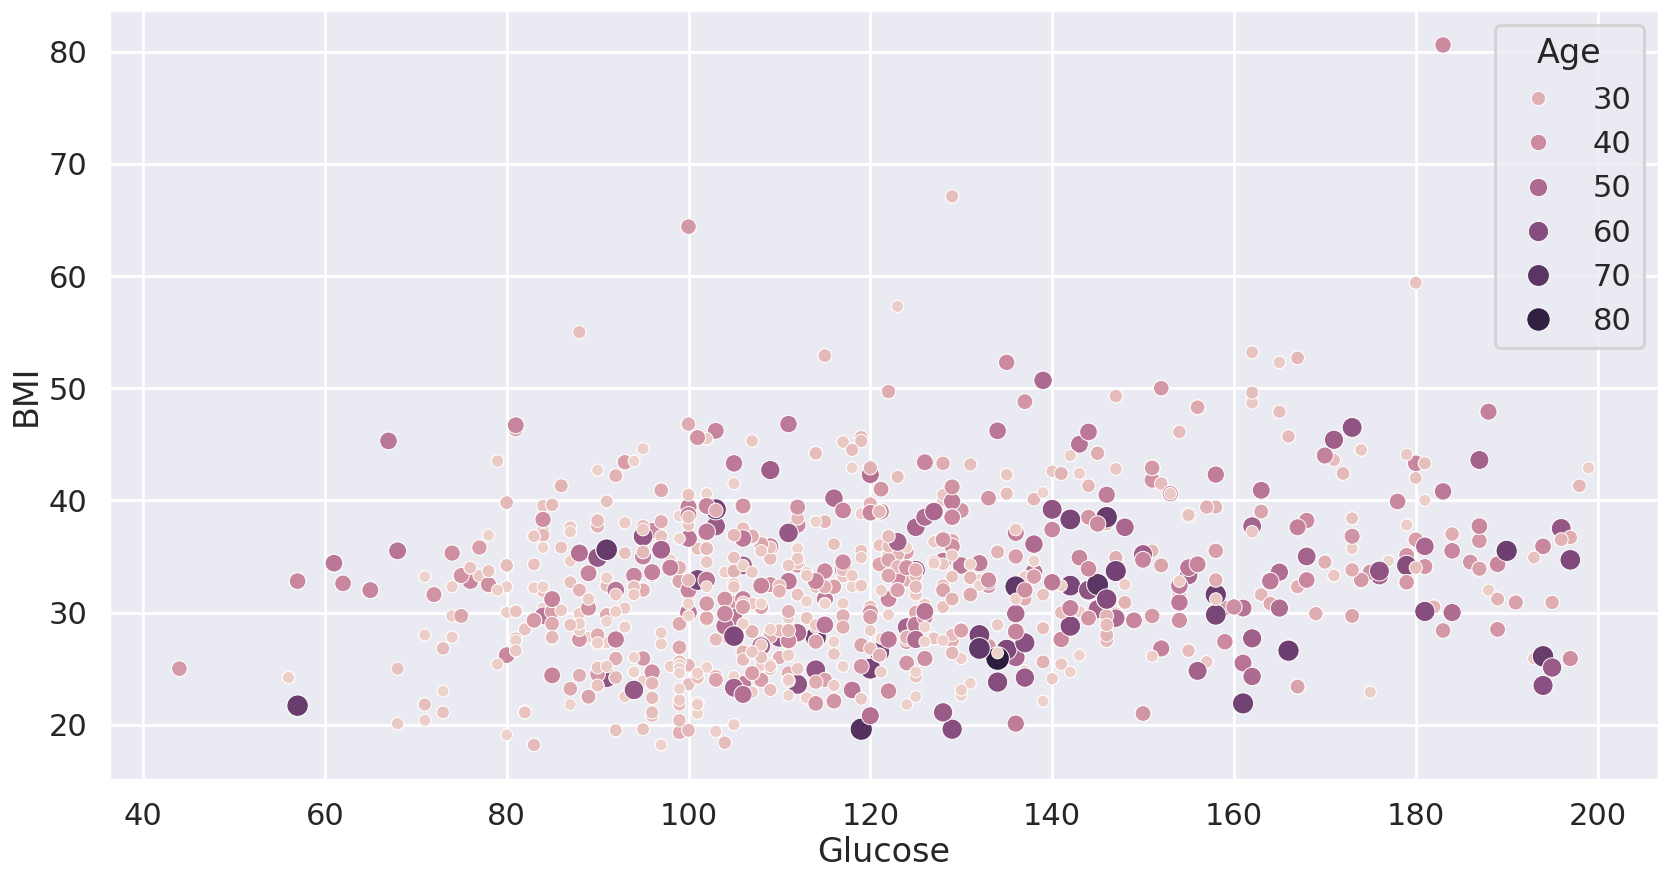

In [48]:
# уровень глюкозы, ИМТ и возраст

plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Glucose", y="BMI", hue="Age", size="Age")

Согласно наблюдению, в классах есть некоторые выбросы. Нам нужно удалить выбросы.


В этой части я удалил все выбросы в наборе данных. Я использовал Метод Тьюки для обнаружения выбросов.

In [50]:
from collections import Counter
import os

def detect_outliers(df,n,features):
    outlier_indices = []
    """
    Detect outliers from given list of features. It returns a list of the indices
    according to the observations containing more than n outliers according
    to the Tukey method
    """
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )

    return multiple_outliers

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df, 2 ,["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])

Здесь я нахожу отклонения от всех характеристик, таких как беременность, глюкоза, кровяное давление, ИМТ, функция родословной диабета, толщина кожи, инсулин и возраст.

In [51]:
df.drop(df.loc[outliers_to_drop].index, inplace=True)

Я успешно удалил все выбросы из набора данных. Следующим шагом является разделение набора данных в режиме обучения, тестирование и продолжение моделирования.

In [53]:
# Прежде чем я разделю набор данных, мне нужно преобразовать данные в квантили, используя sklearn.preprocessing .
# Data Transformation

from sklearn.preprocessing import QuantileTransformer

q  = QuantileTransformer()
X = q.fit_transform(df)
transformedDF = q.transform(X)
transformedDF = pd.DataFrame(X)
transformedDF.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
# Show top 5 rows
transformedDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.397898,0.726727,0.182182,0.798298,0.261762,0.587588,0.029029,0.873373,1.0
1,0.000000,0.083083,0.809810,0.700701,0.736737,0.808809,0.217718,0.205205,0.0
2,0.000000,0.781281,0.393393,0.354354,0.261762,0.945946,0.758258,0.565566,1.0
3,0.000000,0.697197,0.339840,0.932933,0.927928,0.908408,0.488488,0.262262,1.0
4,0.237738,0.735235,0.182182,0.915415,0.984985,0.884384,0.673674,0.000000,0.0


## Разделение данных

In [54]:
features = df.drop(["Outcome"], axis=1)
labels = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=7)

Приведенный выше код разбивает набор данных на обучающий (70%) и тестовый (30%) наборы данных.

## Перекрестная проверка моделей

In [57]:
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """

    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)

    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df

Метод `evaluate_model` берет список моделей и возвращает диаграмму показателей перекрестной проверки с использованием средней точности.

,CrossValMeans,CrossValerrors,Models
0,0.763803,0.031026,LogisticRegression
1,0.925380,0.027840,DecisionTreeClassifier
2,0.931131,0.027069,AdaBoostClassifier
3,0.765976,0.027293,SVC
4,0.939018,0.017813,RandomForestClassifier
5,0.854995,0.021455,GradientBoostingClassifier
6,0.797580,0.022435,KNeighborsClassifier


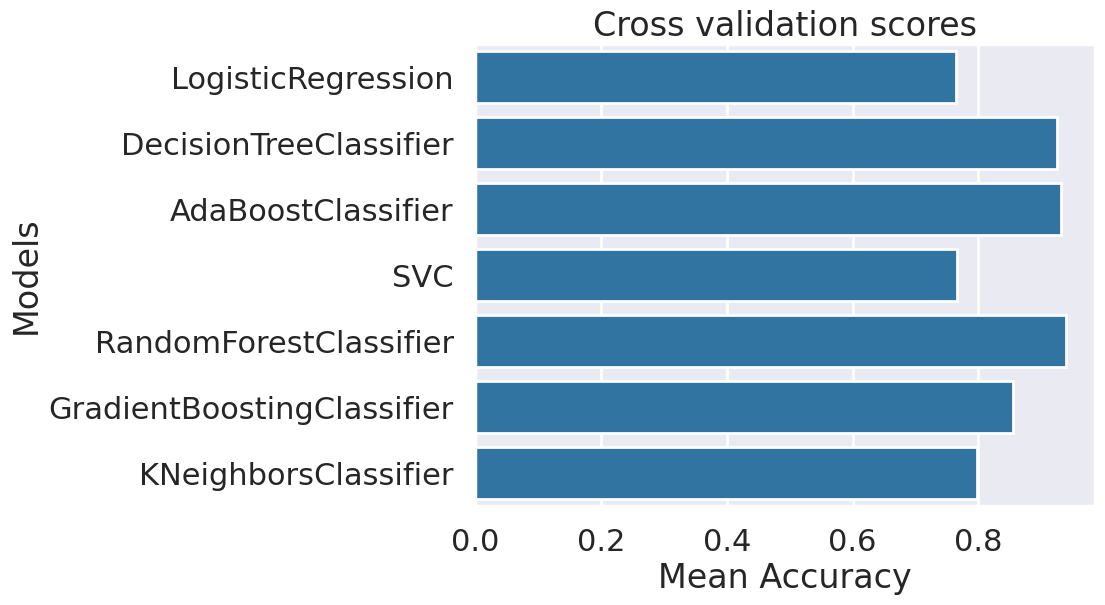

from matplotlib import pyplot as plt
_df_0['CrossValMeans'].plot(kind='hist', bins=20, title='CrossValMeans')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CrossValerrors'].plot(kind='hist', bins=20, title='CrossValerrors')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Models').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='CrossValMeans', y='CrossValerrors', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['CrossValMeans'].plot(kind='line', figsize=(8, 4), title='CrossValMeans')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['CrossValerrors'].plot(kind='line', figsize=(8, 4), title='CrossValerrors')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='CrossValMeans', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Models'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='CrossValerrors', y='Models', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [59]:
# Modeling step Test differents algorithms
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

Согласно приведенному выше наблюдению, я обнаружил, что модели DecisionTreeClassifier, RandomForestClassifier имеют большую точность.

Далее я проведу гиперпараметрическую настройку трех моделей.

## Настройка гиперпараметров

Настройка гиперпараметров — это выбор набора оптимальных гиперпараметров для алгоритма обучения. Гиперпараметр — это аргумент модели, значение которого устанавливается до начала процесса обучения.

Я выполнил процесс настройки для моделей SVC, RandomForestClassifier и LogisticRegression одну за другой.

In [60]:
# Import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
def analyze_grid_result(grid_result):
    '''
    Analysis of GridCV result and predicting with test dataset
    Show classification report at last
    '''
    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)

    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()
    print("Detailed classification report:")
    y_true, y_pred = y_test, grid_result.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

Прежде всего, я импортировал GridSearchCV и classification_report из библиотеки sklearn. Затем я определил метод analyze_grid_result, который покажет результат прогнозирования. Я вызвал этот метод для каждой модели, используемой в SearchCV. На следующем этапе я выполню настройку для каждой модели.

## Логистическая регрессия

In [61]:
# Define models and parameters for LogisticRegression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# Define grid search
grid = dict(solver = solvers, penalty = penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(x_train, y_train)
# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)

Tuned hyperparameters: (best parameters)  {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy : 0.7747619047619048
0.775 (+/-0.146) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.775 (+/-0.146) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.774 (+/-0.147) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.774 (+/-0.146) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.773 (+/-0.146) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.768 (+/-0.149) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.772 (+/-0.137) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.751 (+/-0.132) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.768 (+/-0.141) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.727 (+/-0.156) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detailed classification report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       402
           1   

В LogisticRegression он вернул лучший результат 0,77 с параметрами `{‘C’: 100, ‘penalty’: ‘l2’, ‘solver’: ‘newton-cg’}`.

## Прогноз

In [67]:
# Test predictions
y_pred = logi_result.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       402
           1       0.69      0.55      0.61       196

    accuracy                           0.77       598
   macro avg       0.74      0.71      0.72       598
weighted avg       0.76      0.77      0.76       598



Анализируя коэффициенты логистической регрессии в контексте предсказания диабета, мы можем сделать следующие выводы относительно влияния различных факторов на вероятность его наличия:

- Положительные коэффициенты (например, Glucose и BMI) говорят о том, что с увеличением уровня глюкозы и индекса массы тела вероятность наличия диабета увеличивается.
  
- Отрицательные коэффициенты, включая BloodPressure, Insulin, указывают на то, что низкое давление и инсулин можгут действовать как защитный фактор против диабета.

